In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import stats
from collections import deque
from scipy.optimize import minimize
from scipy.linalg import norm, inv, det, eig
import time
import seaborn as sns
import pickle
sns.set_theme()
np.set_printoptions(precision=2)

# Let's plot!

In [2]:
mu = np.array([[1.0],
               [1.0]])
alpha = np.array([[0.0, 0.0],
                  [0.2, 0.0]])
beta = np.array([[1.0],
                 [1.3]])
noise = 0.5
dim = 2
print("Spectral radius:", np.max(np.abs(np.linalg.eig(alpha)[0])))

Spectral radius: 0.0


In [3]:
def get_param(res, param):
    theta = res['theta']
    if param=='mu1':
        return theta[0], mu[0, 0]
    if param=='mu2':
        return theta[1], mu[1, 0]
    if param=='alpha':
        return theta[2], None
    if param=='beta':
        return theta[3], beta[1, 0]
    if param=='lambda0':
        return theta[4], noise
    return None

def build_mat(param):
    mat = np.zeros((len(list_max_time), len(list_alpha)))
    err_mat = np.zeros_like(mat)
    std_mat = np.zeros_like(mat)
    n_mat = np.zeros_like(mat)
    for i, max_time in enumerate(list_max_time):
        for j, alpha0 in enumerate(list_alpha):
            for res in pkl_results:
                if res['max_time'] == max_time and res['alpha'] == alpha0:
                    est, true_param = get_param(res, param)
                    if param=='alpha':
                        true_param = alpha0
                    mat[i, j] += est
                    err_mat[i, j] += np.abs(true_param - est)
                    std_mat[i, j] += est**2
                    n_mat[i, j] += 1
    mat /= n_mat
    err_mat /= n_mat
    std_mat = np.sqrt(std_mat/n_mat - mat**2)
    return mat, err_mat, std_mat

def plot_mat(m, title='', subplot=None):
    if subplot:
        plt.subplot(1, 3, subplot)
    plt.imshow(m, cmap='Oranges')
    plt.colorbar()
    plt.grid(False)
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            plt.text(j-.18, i, f'{m[i, j]:.2f}')
    plt.xticks(range(len(list_alpha)), labels=list_alpha)
    plt.yticks(range(len(list_max_time)), labels=list_max_time)
    plt.xlabel('alpha')
    plt.ylabel('max time')
    plt.title(title)

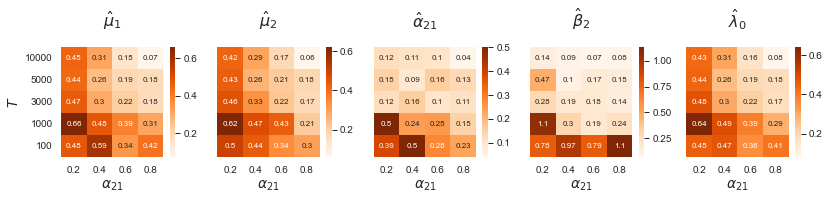

In [4]:
with open('saved_estimations/estimationsAlphaTransition.pkl', 'rb') as fi:
    pkl_results = pickle.load(fi)

set_max_time = set()
set_alpha = set()
for res in pkl_results:
    set_max_time.add(res['max_time'])
    set_alpha.add(res['alpha'])
list_max_time = sorted(set_max_time, reverse=True)
list_alpha = sorted(set_alpha)

list_max_time = sorted([100, 1000, 3000, 5000, 10000], reverse=True)


tex = dict(mu1=r'$\hat\mu_1$', mu2=r'$\hat\mu_2$', alpha=r'$\hat\alpha_{2 1}$', 
           beta=r'$\hat\beta_2$', lambda0=r'$\hat\lambda_0$')
def plot_mat(m, title='', subplot=None):
    if subplot:
        plt.subplot(1, 5, subplot)
    sns.heatmap(m, cmap="Oranges", annot=True, annot_kws={"fontsize":8})
    plt.grid(False)
    #for i in range(m.shape[0]):
    #    for j in range(m.shape[1]):
    #        plt.text(j-.18, i, f'{m[i, j]:.2f}')
    plt.xticks(np.arange(len(list_alpha))+0.5, labels=list_alpha)
    plt.xlabel(r'$\alpha_{2 1}$')
    if subplot ==1:
        plt.yticks(np.arange(len(list_max_time))+0.5, labels=list_max_time, rotation=0)
    
        plt.ylabel(r'$T$')
    else:
        plt.yticks([])
    plt.title(title,pad=20)
    
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16, 'axes.labelsize': 14,
                             'xtick.labelsize': 10,'ytick.labelsize': 10, 'legend.fontsize': 14,
                             })  
fig, ax = plt.subplots(figsize=(5.90666*2, 3), sharey=True)

for i, param in enumerate(['mu1', 'mu2', 'alpha', 'beta', 'lambda0']):
    mat, err_mat, std_mat = build_mat(param)
    plot_mat(np.round(err_mat,2), tex[param], i+1)

plt.tight_layout()
plt.savefig('bivariate_images/phase_transition.pdf', format='pdf', bbox_inches="tight")
#plt.savefig('phase_transition.png')